In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list) 


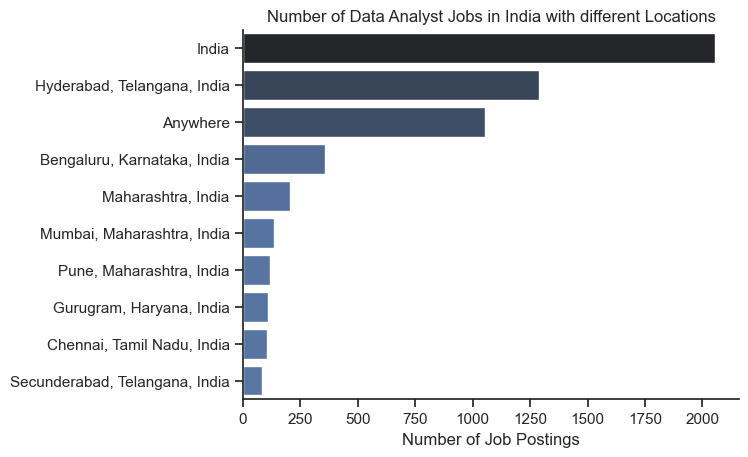

In [12]:
df_DA_IN = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')]

df_plot = df_DA_IN['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Data Analyst Jobs in India with different Locations')
plt.xlabel("Number of Job Postings")
plt.ylabel("")
plt.show()


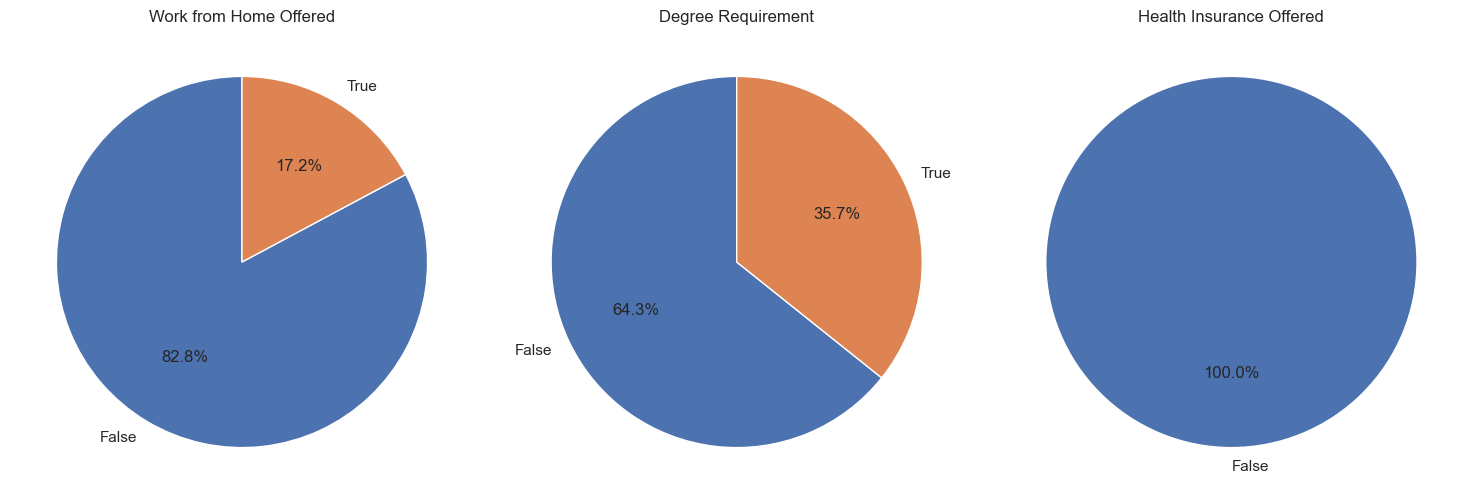

In [20]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_IN[column].value_counts(), labels=df_DA_IN[column].value_counts().index.astype(str), autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

    # centre_circle = plt.Circle((0, 0), 0.70, color='white')
    # ax[i].add_artist(centre_circle)

plt.tight_layout()
plt.show()


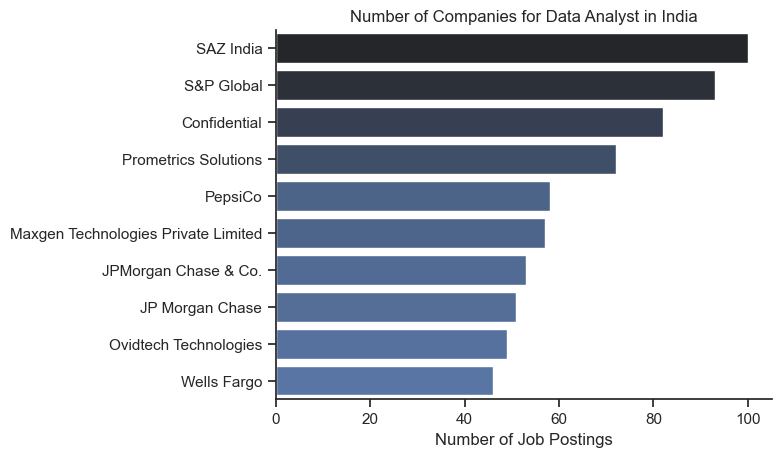

In [21]:
df_plot = df_DA_IN['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Companies for Data Analyst in India')
plt.xlabel("Number of Job Postings")
plt.ylabel("")
plt.show()
